# University Tuition Inflation Project (2018–2025)

This project explores how tuition fees at **MEF, Bilgi, and Kadir Has Universities** have changed from 2018 to 2025, and re-expresses them in funny yet eye-opening ways:

- **TRY (₺) & USD ($)**  
- **Big Mac Index ** → how many Big Mac menus each tuition equals  
- **Asgari Ücret (Minimum Wage) Months** → how many months you'd need to work without spending a dime  

### Why?
Tuition costs in Turkey’s private universities have skyrocketed - in some cases increasing **10× within 7 years**.  
By comparing them to everyday benchmarks (burgers, wages), we highlight just *how expensive education has become*.

## Import Libraries and Analyze The Dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [77]:
df = pd.read_csv("data/university_tuition_project.csv")

In [78]:
df

,University,Year,Department,Scholaship_rate,Tuition_TRY,BigMacMenu_TRY,MinWage_TRY_Monthly,USD_TRY_ExchangeRate
0,MEF,2018,Computer Engineering,50,22090,14,1450,4.811
1,MEF,2019,Computer Engineering,50,25624,19,1829,5.670
2,MEF,2020,Computer Engineering,50,26359,30,2324,7.000
3,MEF,2021,Computer Engineering,50,31586,37,2825,8.860
4,MEF,2022,Computer Engineering,50,47900,53,5500,16.588
5,MEF,2023,Computer Engineering,50,144000,135,11402,23.813
6,MEF,2024,Computer Engineering,50,288000,255,17002,32.881
7,MEF,2025,Computer Engineering,50,516800,350,22104,37.810
8,Kadir Has,2018,Computer Engineering,50,26000,14,1450,4.811
9,Kadir Has,2019,Computer Engineering,50,31250,19,1829,5.670


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   University            24 non-null     object 
 1   Year                  24 non-null     int64  
 2   Department            24 non-null     object 
 3   Scholaship_rate       24 non-null     int64  
 4   Tuition_TRY           24 non-null     int64  
 5   BigMacMenu_TRY        24 non-null     int64  
 6   MinWage_TRY_Monthly   24 non-null     int64  
 7   USD_TRY_ExchangeRate  24 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.6+ KB


In [80]:
df.describe()

,Year,Scholaship_rate,Tuition_TRY,BigMacMenu_TRY,MinWage_TRY_Monthly,USD_TRY_ExchangeRate
count,24.000000,24.0,24.000000,24.000000,24.000000,24.000000
mean,2021.500000,50.0,159169.833333,111.625000,8054.500000,17.179125
std,2.340568,0.0,191633.496157,120.706548,7556.224074,12.378764
min,2018.000000,50.0,22090.000000,14.000000,1450.000000,4.811000
25%,2019.750000,50.0,31502.000000,27.250000,2200.250000,6.667500
50%,2021.500000,50.0,46767.000000,45.000000,4162.500000,12.724000
75%,2023.250000,50.0,195375.000000,165.000000,12802.000000,26.080000
max,2025.000000,50.0,650000.000000,350.000000,22104.000000,37.810000


## Feature Engineering

In [81]:
df = df.copy()

def safe_div(a, b):
    out = np.where((b!=0) & (~pd.isna(b)), a/b, np.nan)
    return out

df["Tuition_USD"] = safe_div(df["Tuition_TRY"], df["USD_TRY_ExchangeRate"])
df["Tuition_in_BigMacs"] = safe_div(df["Tuition_TRY"], df["BigMacMenu_TRY"])
df["Tuition_in_MinWages"] = safe_div(df["Tuition_TRY"], df["MinWage_TRY_Monthly"])

df["Tuition_USD"] = df["Tuition_USD"].round(0).astype("Int64")
df["Tuition_in_BigMacs"] = df["Tuition_in_BigMacs"].round(1)
df["Tuition_in_MinWages"] = df["Tuition_in_MinWages"].round(2)

df

,University,Year,Department,Scholaship_rate,Tuition_TRY,BigMacMenu_TRY,MinWage_TRY_Monthly,USD_TRY_ExchangeRate,Tuition_USD,Tuition_in_BigMacs,Tuition_in_MinWages
0,MEF,2018,Computer Engineering,50,22090,14,1450,4.811,4592,1577.9,15.23
1,MEF,2019,Computer Engineering,50,25624,19,1829,5.670,4519,1348.6,14.01
2,MEF,2020,Computer Engineering,50,26359,30,2324,7.000,3766,878.6,11.34
3,MEF,2021,Computer Engineering,50,31586,37,2825,8.860,3565,853.7,11.18
4,MEF,2022,Computer Engineering,50,47900,53,5500,16.588,2888,903.8,8.71
5,MEF,2023,Computer Engineering,50,144000,135,11402,23.813,6047,1066.7,12.63
6,MEF,2024,Computer Engineering,50,288000,255,17002,32.881,8759,1129.4,16.94
7,MEF,2025,Computer Engineering,50,516800,350,22104,37.810,13668,1476.6,23.38
8,Kadir Has,2018,Computer Engineering,50,26000,14,1450,4.811,5404,1857.1,17.93
9,Kadir Has,2019,Computer Engineering,50,31250,19,1829,5.670,5511,1644.7,17.09


In [82]:
print(df.isna().sum()) # missing values

University              0
Year                    0
Department              0
Scholaship_rate         0
Tuition_TRY             0
BigMacMenu_TRY          0
MinWage_TRY_Monthly     0
USD_TRY_ExchangeRate    0
Tuition_USD             0
Tuition_in_BigMacs      0
Tuition_in_MinWages     0
dtype: int64


## Visuals

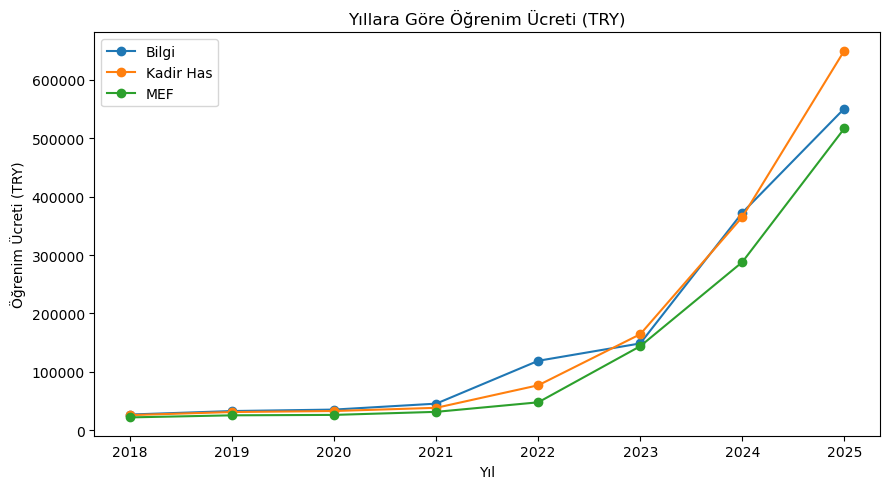

In [83]:
plt.figure(figsize=(9,5))
for uni, sub in df.sort_values("Year").groupby("University"):
    plt.plot(sub["Year"], sub["Tuition_TRY"], marker="o", label=uni)

plt.title("Yıllara Göre Öğrenim Ücreti (TRY)")
plt.xlabel("Yıl")
plt.ylabel("Öğrenim Ücreti (TRY)")
plt.legend()
plt.tight_layout()
plt.savefig("tuition_prices_try_line_chart.png", dpi=300, bbox_inches="tight")
plt.show()

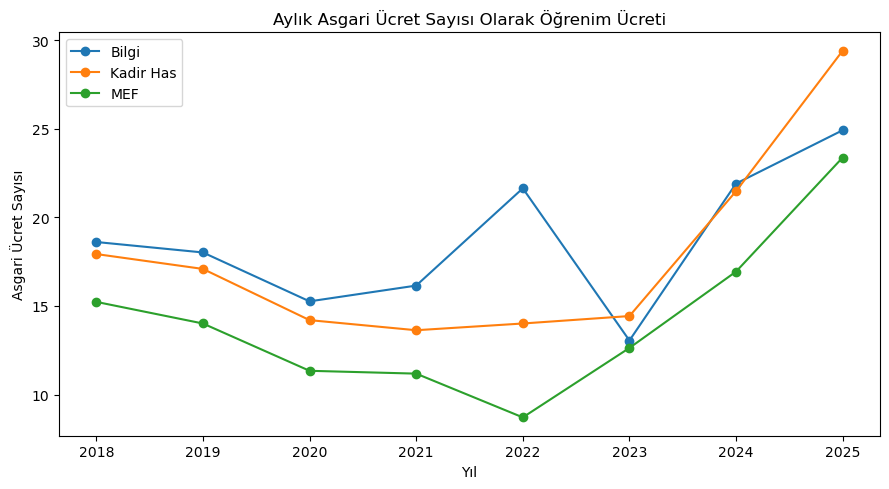

In [84]:
plt.figure(figsize=(9,5))
for uni, sub in df.sort_values("Year").groupby("University"):
    plt.plot(sub["Year"], sub["Tuition_in_MinWages"], marker="o", label=uni)

plt.title("Aylık Asgari Ücret Sayısı Olarak Öğrenim Ücreti")
plt.xlabel("Yıl")
plt.ylabel("Asgari Ücret Sayısı")
plt.legend()
plt.tight_layout()
plt.savefig("min_wage_tuition_line_chart.png", dpi=300, bbox_inches="tight")
plt.show()

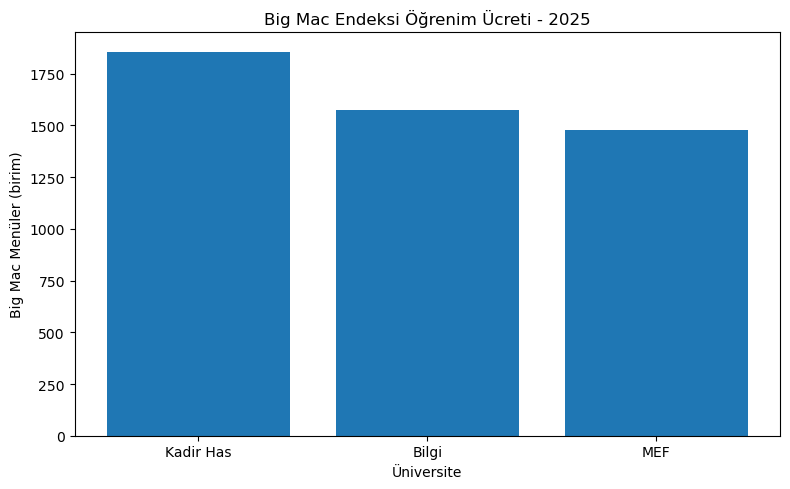

,University,Year,Tuition_TRY,BigMacMenu_TRY,Tuition_in_BigMacs
15,Kadir Has,2025,650000,350,1857.1
23,Bilgi,2025,550900,350,1574.0
7,MEF,2025,516800,350,1476.6


In [85]:
latest_year = df["Year"].max()
latest = (
    df[df["Year"] == latest_year]
    .sort_values("Tuition_in_BigMacs", ascending=False)
)

plt.figure(figsize=(8,5))
plt.bar(latest["University"], latest["Tuition_in_BigMacs"])
plt.title(f"Big Mac Endeksi Öğrenim Ücreti - {latest_year}")
plt.ylabel("Big Mac Menüler (birim)")
plt.xlabel("Üniversite")
plt.tight_layout()
plt.show()

latest[["University","Year","Tuition_TRY","BigMacMenu_TRY","Tuition_in_BigMacs"]]

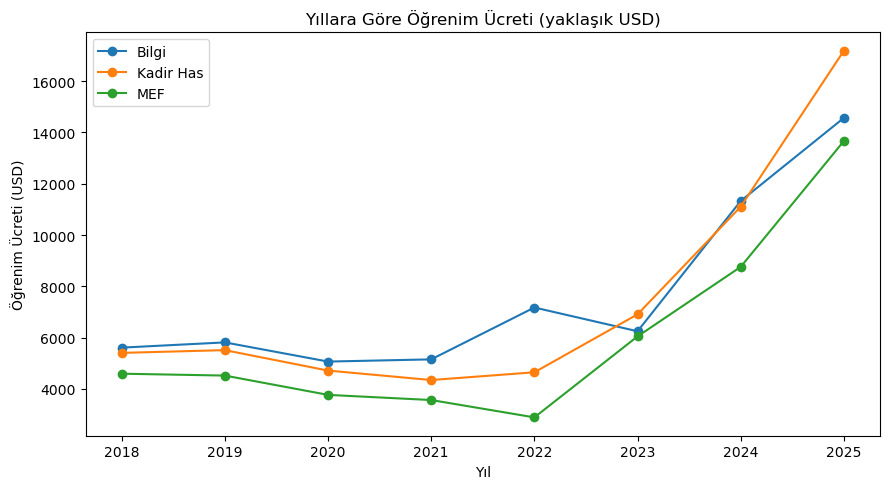

In [86]:
plt.figure(figsize=(9,5))
for uni, sub in df.sort_values("Year").groupby("University"):
    plt.plot(sub["Year"], sub["Tuition_USD"], marker="o", label=uni)

plt.title("Yıllara Göre Öğrenim Ücreti (yaklaşık USD)")
plt.xlabel("Yıl")
plt.ylabel("Öğrenim Ücreti (USD)")
plt.legend()
plt.tight_layout()
plt.savefig("tuition_prices_dollar_line_chart.png", dpi=300, bbox_inches="tight")
plt.show()

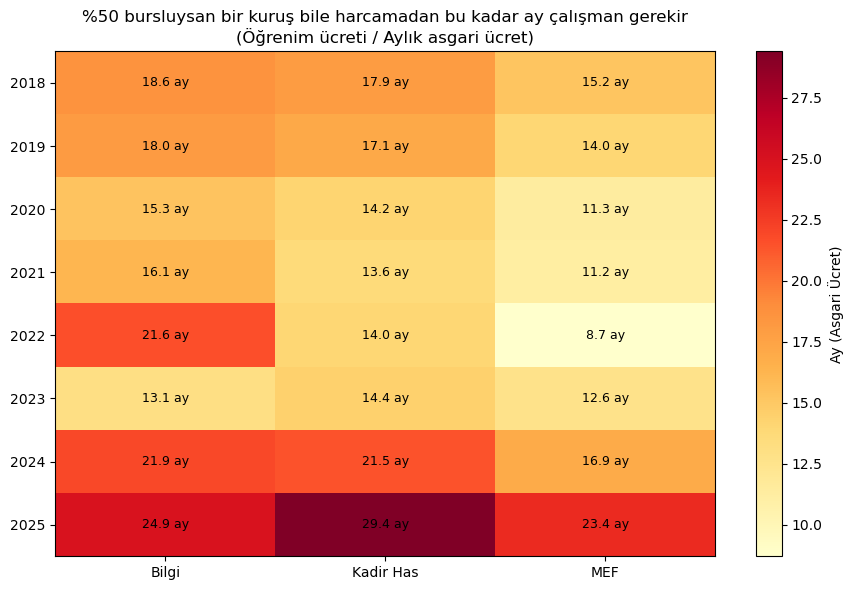

In [87]:
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(pivot.values, aspect="auto", cmap="YlOrRd")
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=0)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)

for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"{val:.1f} ay", ha="center", va="center", fontsize=9, color="black")

cbar = plt.colorbar(im)
cbar.set_label("Ay (Asgari Ücret)")
ax.set_title("%50 bursluysan bir kuruş bile harcamadan bu kadar ay çalışman gerekir\n(Öğrenim ücreti / Aylık asgari ücret)")
plt.tight_layout()
plt.savefig("funniest_visual.png", dpi=300, bbox_inches="tight")
plt.show()


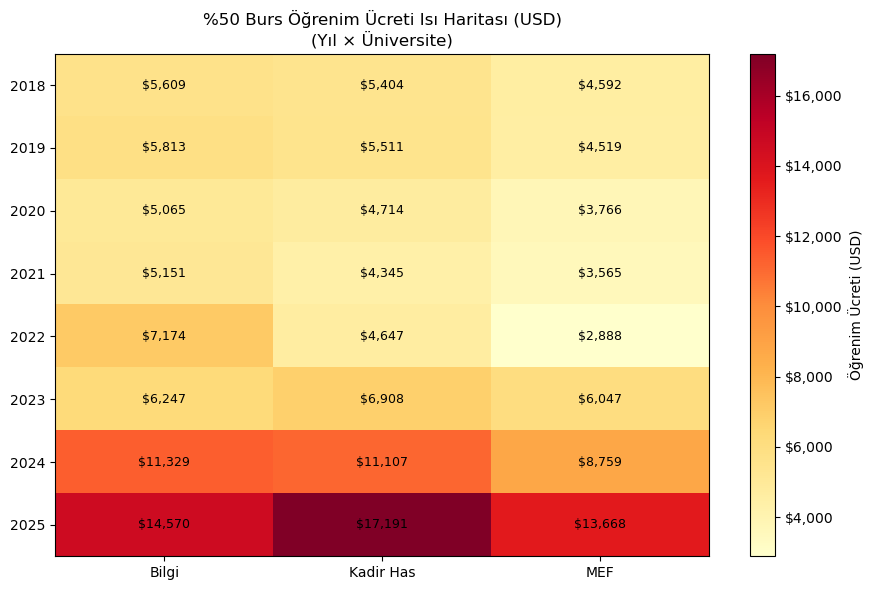

In [90]:
import numpy as np
import pandas as pd

def safe_div(a, b):
    return np.where((b!=0) & (~pd.isna(b)), a/b, np.nan)


pivot_usd = (df
             .pivot_table(index="Year", columns="University", values="Tuition_USD")
             .sort_index())

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(pivot_usd.values, aspect="auto", cmap="YlOrRd")  # aynı stil + okunaklı palet

ax.set_xticks(range(len(pivot_usd.columns)))
ax.set_xticklabels(pivot_usd.columns)
ax.set_yticks(range(len(pivot_usd.index)))
ax.set_yticklabels(pivot_usd.index)

for i in range(pivot_usd.shape[0]):
    for j in range(pivot_usd.shape[1]):
        val = pivot_usd.values[i, j]
        if not np.isnan(val):
            ax.text(j, i, f"${val:,.0f}", ha="center", va="center", fontsize=9, color="black")

cbar = plt.colorbar(im, format=FuncFormatter(lambda v,_: f"${v:,.0f}"))
cbar.set_label("Öğrenim Ücreti (USD)")

ax.set_title("%50 Burs Öğrenim Ücreti Isı Haritası (USD)\n(Yıl × Üniversite)")
plt.tight_layout()
plt.savefig("heatmap_tuition.png", dpi=300, bbox_inches="tight")
plt.show()

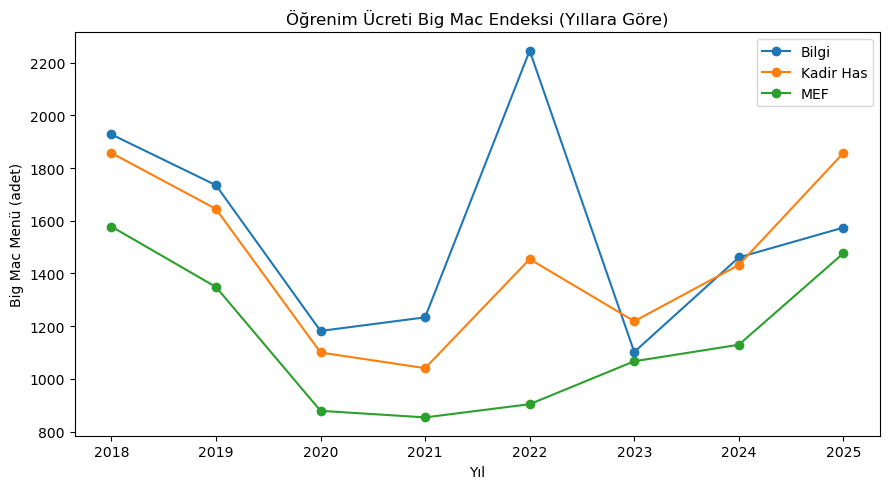

In [89]:
plt.figure(figsize=(9,5))

for uni, sub in df.sort_values("Year").groupby("University"):
    plt.plot(sub["Year"], sub["Tuition_in_BigMacs"], marker="o", label=uni)

plt.title("Öğrenim Ücreti Big Mac Endeksi (Yıllara Göre)")
plt.xlabel("Yıl")
plt.ylabel("Big Mac Menü (adet)")
plt.legend()
plt.tight_layout()
plt.savefig("bigmacindexlinechart.png", dpi=300, bbox_inches="tight")
plt.show()